<a href="https://colab.research.google.com/github/Rony-crypto/100-days-of-Code-Harry/blob/main/Exercise_1_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 |  Group Number: 1     |
|---------------------|
| Member 1: Christopher Lensch |
| Member 1: Usman Hussain |
| Member 2: Chowdhury Saleh Ahmed Rony |


In [ ]:
import matplotlib.pyplot as plt
import imageio.v3 as io
from skimage import color
from skimage.transform import integral_image, integrate
import numpy as np

image = io.imread('visual_attention_ds.png')
rgb_image = color.rgba2rgb(image)
grayscale_image = color.rgb2gray(rgb_image)
integral_img = integral_image(grayscale_image)

In [ ]:
def compute_contrast_map(integral_img, center_size, surround_size):
    contrast_map = np.zeros_like(integral_img, dtype=np.float32)
    h, w = integral_img.shape
    c_half = center_size // 2
    s_half = surround_size // 2

    for i in range(s_half, h - s_half):
        for j in range(s_half, w - s_half):
            # Calculate the sum in the surround window and center window, ensuring they return scalars
            s_sum = np.sum(integrate(integral_img, (i - s_half, j - s_half), (i + s_half, j + s_half)))
            c_sum = np.sum(integrate(integral_img, (i - c_half, j - c_half), (i + c_half, j + c_half)))
            # Surround-center contrast as a scalar
            contrast_map[i, j] = s_sum - c_sum

    return contrast_map


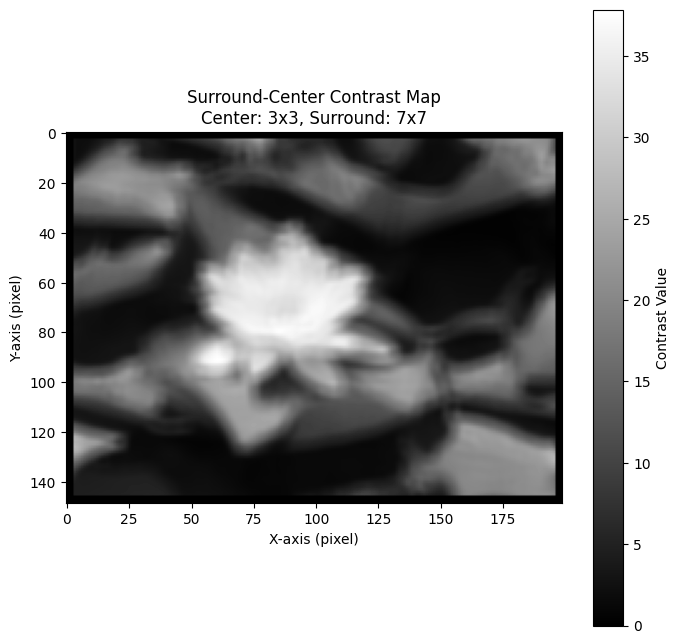

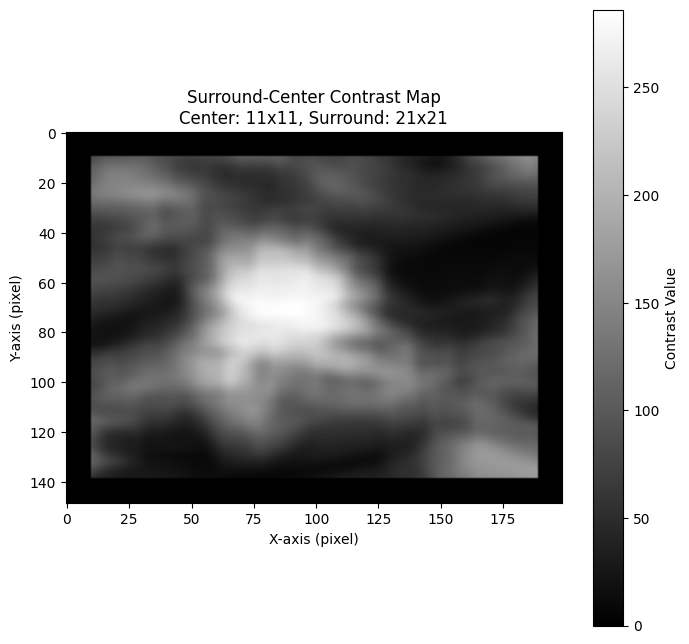

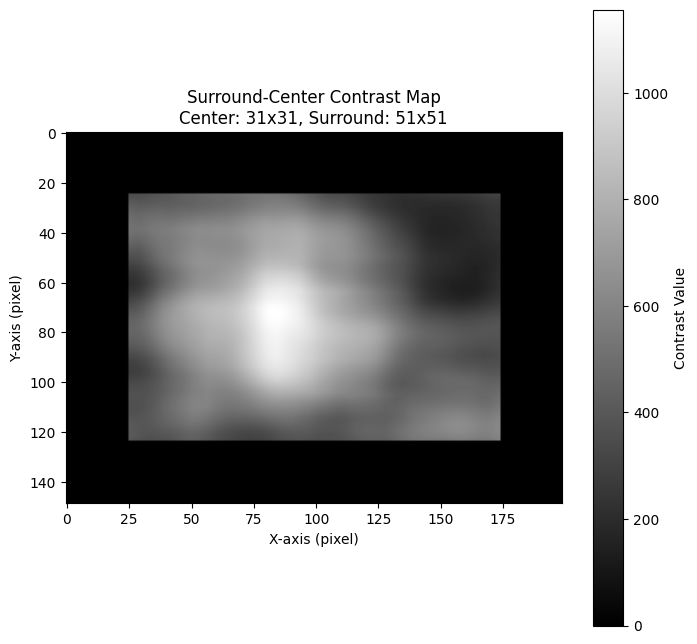

In [ ]:
window_pairs = [(3, 7), (11, 21), (31, 51)]

for idx, (center_size, surround_size) in enumerate(window_pairs):
    contrast_map = compute_contrast_map(integral_img, center_size, surround_size)

    # Create a new figure for each plot with an appropriate size
    plt.figure(figsize=(8, 8))
    plt.imshow(contrast_map, cmap='gray')
    plt.title(f'Surround-Center Contrast Map\nCenter: {center_size}x{center_size}, Surround: {surround_size}x{surround_size}')
    plt.colorbar(label='Contrast Value')
    plt.xlabel('X-axis (pixel)')
    plt.ylabel('Y-axis (pixel)')
    plt.show()


    # Show each figure in non-blocking mode
    #plt.show(block=True)


In [ ]:
# import matplotlib.pyplot as plt

# # Define window sizes for experiments
# window_pairs = [(11, 21), (3, 7), (31, 51)]

# for center_size, surround_size in window_pairs:
#     contrast_map = compute_contrast_map(integral_img, center_size, surround_size)
#     plt.imshow(contrast_map, cmap='gray')
#     plt.title(f'Center Size: {center_size}x{center_size}, Surround Size: {surround_size}x{surround_size}')
#     plt.colorbar()
#     plt.show()




 <u> **Observations:** </u>

*   ***Small center-surround windows (3x3, 7x7):*** This window size captures fine details and edges within an image. By focusing on small, localized regions, they enhance the visibility of high-frequency components, such as edges and textures. As a result, the contrast map generated with these smaller windows enhances finer details which makes it well-suited for applications that require precise detection of subtle edges and textures.
*  ***Medium center-surround windows (11x11, 21x21):*** This Medium-sized windows provide a balanced approach by capturing details at an intermediate level. They are effective for highlighting mid-sized objects within an image, creating a contrast map that balances detail with background context. This size is particularly useful in scenarios where both fine details and broader image content need to be represented without overwhelming the viewer with too much or too little information

* ***Large center-surround windows (31x31, 51x51):*** This large window focuses on broader regions, generating smoother, less detailed contrast maps. Large center-surround windows are useful for emphasizing overall structure and shape rather than detailed edges which makes them ideal for applications that prioritize larger regions with less details.









